In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# SQLAlchemygenerates SQL statements from python
from sqlalchemy import create_engine

In [26]:

# Used this link to figure out how to connect a PostgresSQL database to jupyter: https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost'  
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'postgres'  
POSTGRES_DBNAME = 'sqlchal' 
# A long string that contains the necessary Postgres login information
postgres_str = (('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}').format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)


In [27]:
salaries = pd.read_sql_query('SELECT * FROM salaries',conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [28]:
titles = pd.read_sql_query('SELECT * FROM titles',conn)
del titles['to_date']
titles.head()

,emp_no,title,from_date
0,10001,Senior Engineer,1986-06-26
1,10002,Staff,1996-08-03
2,10003,Senior Engineer,1995-12-03
3,10004,Engineer,1986-12-01
4,10004,Senior Engineer,1995-12-01


In [29]:
groupbyemp = titles.groupby("emp_no")
titlesmod = pd.DataFrame({'from_date':groupbyemp['from_date'].max()})
titlesmod.reset_index(inplace=True)
titlesmod.head()

,emp_no,from_date
0,10001,1986-06-26
1,10002,1996-08-03
2,10003,1995-12-03
3,10004,1995-12-01
4,10005,1996-09-12


In [30]:
mergedtitles = pd.merge(titlesmod,titles,how='left',left_on=['emp_no','from_date'],right_on=['emp_no','from_date'])
print(len(mergedtitles))
mergedtitles.head()

300024


,emp_no,from_date,title
0,10001,1986-06-26,Senior Engineer
1,10002,1996-08-03,Staff
2,10003,1995-12-03,Senior Engineer
3,10004,1995-12-01,Senior Engineer
4,10005,1996-09-12,Senior Staff


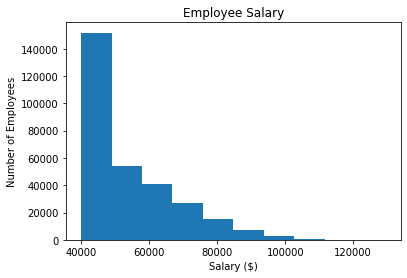

In [32]:
salarylist = salaries['salary'].tolist()
plt.hist(salarylist) 
# plt.hist(salarylist,density=1, bins=20) 
# plt.axis([35000,125000, 0,160000]) 
plt.title("Employee Salary")
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.show()

In [33]:
titlesNsalaries = pd.merge(mergedtitles, salaries, on="emp_no", how="outer")
titlesNsalaries.head()

,emp_no,from_date_x,title,salary,from_date_y,to_date
0,10001,1986-06-26,Senior Engineer,60117,1986-06-26,1987-06-26
1,10002,1996-08-03,Staff,65828,1996-08-03,1997-08-03
2,10003,1995-12-03,Senior Engineer,40006,1995-12-03,1996-12-02
3,10004,1995-12-01,Senior Engineer,40054,1986-12-01,1987-12-01
4,10005,1996-09-12,Senior Staff,78228,1989-09-12,1990-09-12


In [34]:
groupbytitle = titlesNsalaries.groupby("title")
title_salary = groupbytitle[["salary"]].mean()
title_salary

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,49600.555556
Senior Engineer,48506.799871
Senior Staff,58503.993042
Staff,58432.774004
Technique Leader,48582.425800


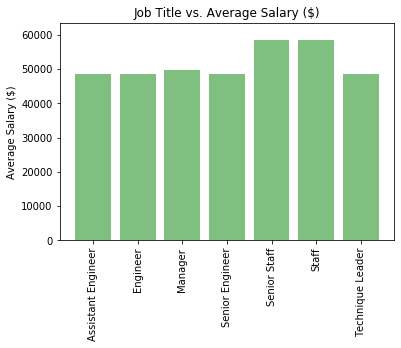

In [40]:
salaries = title_salary['salary'].tolist()
x_axis = np.arange(len(salaries))
plt.bar(x_axis, salaries, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_salary.index.tolist(),rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(salaries)+5000)
plt.title("Job Title vs. Average Salary ($)")
plt.ylabel("Average Salary ($)")
plt.savefig("Title_Salary.png")
plt.show()